In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from text_recognizer.datasets.iam_lines import IamLinesDataset

In [3]:
dataset = IamLinesDataset()
dataset.load_or_generate_data()

In [4]:
print(dataset)

IAM Lines Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Train: (7101, 28, 944) (7101, 97, 80)
Test: (1861, 28, 944) (1861, 97, 80)



Text(0.5,1.05,'that Labour should not take any steps____________________________________________________________')

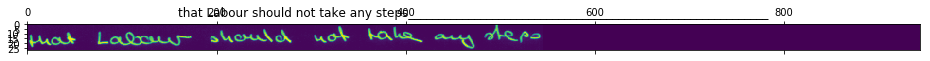

In [5]:
ind = 16
plt.matshow(dataset.x_train[ind])
plt.title(''.join([dataset.mapping[_] for _ in dataset.y_train_int[ind]]))

(28, 944)
(28, 952)


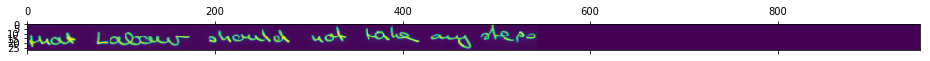

In [6]:
x = dataset.x_train[ind]
print(x.shape)
x2 = np.pad(x, ((0, 0), (0, 34 * 28 - x.shape[-1])), 'constant')
print(x2.shape)
plt.matshow(x2)

In [7]:
x_train = np.pad(dataset.x_train, ((0, 0), (0, 0), (0,  34 * 28 - dataset.x_train.shape[-1])), 'constant')
x_test = np.pad(dataset.x_test, ((0, 0), (0, 0), (0,  34 * 28 - dataset.x_test.shape[-1])), 'constant')
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)

(7101, 28, 952)
(1861, 28, 952)
uint8


In [8]:
with h5py.File('../data/processed/iam_lines/iam_lines.h5', 'a') as f:
    f.create_dataset(f'x_train', data=x_train, dtype='u1', compression='lzf')
    f.create_dataset(f'y_train', data=dataset.y_train_int, dtype='u1', compression='lzf')
    f.create_dataset(f'x_test', data=x_test, dtype='u1', compression='lzf')
    f.create_dataset(f'y_test', data=dataset.y_test_int, dtype='u1', compression='lzf')
